### Emma Klemets, 260775167   
All my work, code, output and written answers are in this notebook.

In [203]:
import numpy as np
import matplotlib.pyplot as plt

### 1) 
Write a function that will shift an array by an arbitrary amount using a convolution (yes, I know there are easier ways to do this). The function should take 2 arguments - an array, and an amount by which to shift the array. Plot a gaussian that started in the centre of the array shifted by half the array length.

In [204]:

def shiftFunction(arr, dx):
    arrFT = np.fft.fft(arr)
    #convolve with shifted delta function
    # FFT of delta(x-a) is just an exp(-2i pi k a /N)

    N=x.size
    k=np.arange(N)
    delFT = np.exp(-2j*np.pi*k*dx/N)

    shiftedArr = np.fft.ifft(arrFT*delFT)
    return shiftedArr.real

10000.0


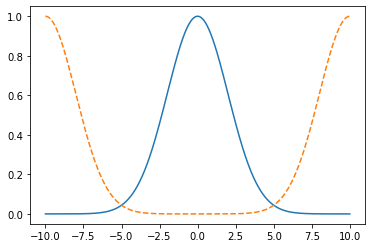

In [101]:
dx = 0.001
x = np.arange(-10, 10, dx)

#gaussian function
mean = 0
std = 2
gaussian = np.exp(-(x - mean)**2 / (2*std**2))

#shift by half the length
shift = len(x)/2
print(shift)

#could shift by arbitrary amount using this 
# shift = 5 / dx
# print(shift)

gaussianShift = shiftFunction(gaussian, shift)

plt.plot(x, gaussian)

plt.plot(x, gaussianShift, ls="--")
plt.show()

### 2) 
The correlation function f*g is integral of f(x)g(x+y)dx. Through a similar proof, one can show f * g = ift(dft(f) ∗ conj(dft(g))). Write a routine to take the correlation function of two arrays. Plot the correlation function of a Gaussian with itself.

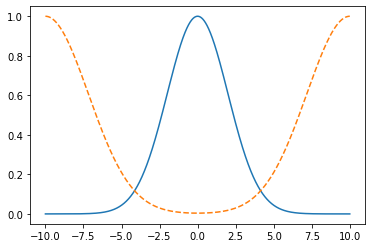

In [130]:
def corrFunction(arr1, arr2):
    arrFT1 = np.fft.fft(arr1)
    arrFT2 = np.fft.fft(arr2)
    
    # corrFunct = np.fft.ifft(arrFT * np.conj(arrFT2))
    corrFunct = np.fft.ifft(arrFT * np.fft.fft(arr2[::-1]))
    return corrFunct.real/max(corrFunct.real) #should i scale it??


gaussianCor = corrFunction(gaussian, gaussian)
plt.plot(x, gaussian)

plt.plot(x, gaussianCor, ls="--")
plt.show()

### 3) 
Using the results of part 1 and part 2, write a routine to take the correlation function of a Gaussian (shifted by an arbitrary amount) with itself. How does the correlation function depend on the shift? Does this surprise you?

10000.0
5000.0


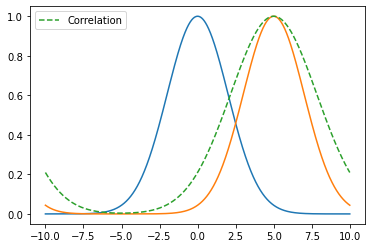

In [136]:
# gaussian = np.exp(-(x - mean)**2 / (2*std**2))

#shift by half the length
shift = len(x)/2
print(shift)

#could shift by arbitrary amount using this 
shift = 5 / dx
print(shift)

gaussianShift = shiftFunction(gaussian, shift)
gaussianShift_Cor = corrFunction(gaussian, gaussianShift)

plt.plot(x, gaussian)

plt.plot(x, gaussianShift)
plt.plot(x, gaussianShift_Cor, ls="--", label="Correlation")
plt.legend()
plt.show()

This seems wrong, I though the corr function should be max where the functions over lap? - or is it look the same?

### 4) 
The circulant (wrap-around) nature of the dft can sometimes be problematic. Write a routine to take the convolution of two arrays without any danger of wrapping around. You may wish to add zeros to the end of the input arrays.

In [326]:
def convFunction(arr1, arr2, p=5):
    
    arrFT1 = np.fft.fft(np.pad(arr1, [0, p]))
    arrFT2 = np.fft.fft(np.pad(arr2, [0, p]))
        
    convolved = np.fft.ifft(arrFT1 * arrFT2)
    
    if p > 0:
        convolved = convolved[:-p]

    return convolved.real

50


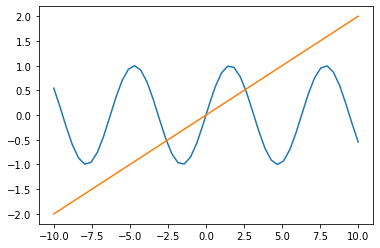

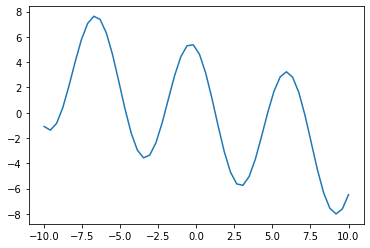

In [327]:
x = np.linspace(-10, 10)

print(len(x))

f1 = np.sin(x)
f2 = 0.2*x

plt.plot(x, f1)
plt.plot(x, f2)

plt.show()

cf = convFunction(f1, f2, p=50)

plt.plot(x, cf)
plt.show()

### 5) 
DFTs work very nicely out of the box when there are an integer number of periods of a wave in the region analyzed. Sadly, when we are dealing with real data, we usually are forced to analyze a finite chunk of data, and there will in general be no particular relation between the frequencies in the data and the interval we’re analyzing. We’ll look at the effects of this a bit now.

#### a) 
Show that: $\sum^{N-1}_{x=0} exp (-2i\pi kx/N) = \frac{1-exp(-2i\pi k)}{1-exp(-2i\pi k/N)}$

$\sum^{N-1}_{x=0} exp (-2i\pi kx/N) \\
= \sum^{N-1}_{x=0} \alpha ^x  ~~ where~ \alpha = exp (-2i\pi k/N)$   
This is simply a geometric series.   

$$
S = \sum^{N-1}_{x=0} \alpha ^x = 1 + \alpha + \alpha^2 + ... +\alpha^{N-1} \\
\text{multiply both sides by $\alpha$:} ~~~ S\alpha = \alpha + \alpha^2 + ... +\alpha^{N} \\
\text{subtract from previous line:} \\
S - S\alpha = 1 + \alpha + \alpha^2 + ... +\alpha^{N-1} - (\alpha + \alpha^2 + ... +\alpha^{N} ) \\
(1-\alpha)S = 1 - \alpha^{N} \\
\implies S = \frac{1 - \alpha^{N}}{1 - \alpha}
$$
And putting the value of $\alpha$ back in, we get:   
$\sum^{N-1}_{x=0} exp (-2i\pi kx/N) = S = \frac{1-exp(-2i\pi k/N)^N}{1-exp(-2i\pi k/N)} = \frac{1-exp(-2i\pi k)}{1-exp(-2i\pi k/N)} $

#### b) 
Show that this approaches N as k approaches zero, and is zero for any integer k that is not a multiple of N

$lim_{k\rightarrow 0} \frac{1-exp(-2i\pi k)}{1-exp(-2i\pi k/N)} = \frac{0}{0} \implies \text{use L'Hôpital's}\\
= lim_{k\rightarrow 0} \frac{d/dk (1-exp(-2i\pi k))}{d/dk(1-exp(-2i\pi k/N))} = lim_{k\rightarrow 0} \frac{ -(-2i\pi~ exp(-2i\pi k))}{-(-2i\pi /N ~ exp(-2i\pi k/N))}\\
= lim_{k\rightarrow 0} \frac{ N ~exp(-2i\pi k)}{ exp(-2i\pi k/N)} = N ~ lim_{k\rightarrow 0} \frac{ exp(-2i\pi k)}{ exp(-2i\pi k/N)} = N
$

In [219]:
#like with math or code - let's do both?

def limit(N, k):
    return (1 - np.exp(-2j*np.pi*k)) / (1 - np.exp(-2j*np.pi*k/N))

In [ ]:
N = 10
#could print dif compared to N
for k in np.linspace(10, 1e-14, 50):
    print("{:e}".format(limit(N, k)))

In [ ]:
N = 5
for k in np.linspace(1, 100, dtype='int'):
    if k%N == 0:
        print("Multiple: {}".format(k))
#     print("{:e}".format(limit(N, k)))
    print((np.cos(2*np.pi*k), np.sin(2*np.pi*k)), (np.cos(2*np.pi*k/N), np.sin(2*np.pi*k/N)))
#well not quite zero, but that's probably a rounding thing  

#### c) 
We can use this to analytically write down the DFT of a non-integer sine wave. Pick a non-integer value of k and plot your analytic estimate of the DFT. Show that the FFT agrees (to within machine precision) with your analytic estimate. Normally, we think of the Fourier transform of a pure sine wave to be a delta function. Are we close to that? This phenomenon is usually known as spectral leakage.

100 10.0


C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in cdouble_scalars
  after removing the cwd from sys.path.


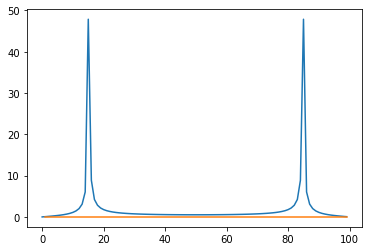

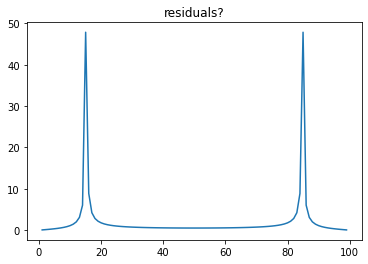

In [332]:
def analyticSinFT(sinA, ak, N):
#     N = len(sinA)
    N=x.size
    kVals=np.arange(N)
    coeff = np.array([limit(N, k) for k in kVals])
    return coeff *sum(sinA)


x = np.linspace(0, 10, 100)
k = 1.5
sinArr = np.sin(2*np.pi*k*x)


print(len(x), max(x))

sinArrDFT = np.fft.fft(sinArr)
sinArrAn = analyticSinFT(sinArr, k, len(x))
# print(sinArrAn)
# plt.plot(x, sinArr)

# plt.axvline(k)
plt.plot(abs(sinArrDFT))
plt.plot(abs(sinArrAn))
plt.show()

#not good
plt.title("residuals?")
plt.plot(abs(sinArrDFT - sinArrAn))
plt.show()

This looks similar to a delta function, with a large spike at ___ but, the base of the spike is quite wide, 

#### d) 
A common tool to get around this is the use of window functions. The leakage essentially comes from the fact that we have a sharp jump at the edge of the interval. If we multiply our input data by a function that goes to zero at the edges, this cancels out the jump, and so prevents the leakage from the jumps at the edges. Of course, since we have multiplied by the window in real space, we have convolved by it in Fourier space. One simple window we could use is 0.5 − 0.5 cos(2πx/N) (there are many, many choices). Show that when we multiply by this window, the spectral leakage for a non-integer period sine wave drops dramatically.

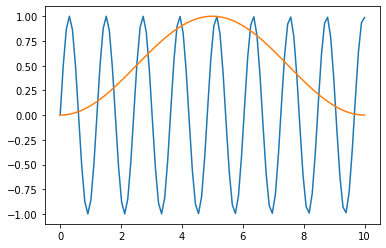

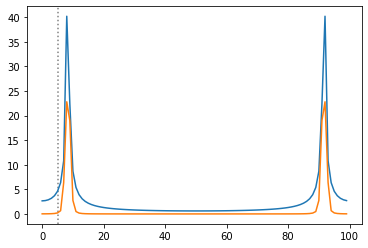

In [320]:
#https://www.analog.com/media/en/technical-documentation/dsp-book/dsp_book_Ch8.pdf

window = lambda x, N: 0.5 - 0.5*np.cos(2*np.pi*x/N)

# is this actually right, i though n was the number of points, but that really doesn't give a good answer
# only really works when x starts at 0??
# am i off by a factor of 2pi in the sin / cos ?
x = np.linspace(0, 10, 100)
k = 5.2
sinArr = np.sin(k*x)

plt.plot(x, sinArr)
plt.plot(x, window(x, max(x)))
plt.show()

sinArrDFT = np.fft.fft(sinArr)
sinArrDFT_win = np.fft.fft(sinArr*window(x, max(x)))

plt.axvline(k, ls=":", color="grey")
plt.plot(abs(sinArrDFT))
plt.plot(abs(sinArrDFT_win))
plt.show()

#### e) 
Show that the Fourier transform of the window is [N/2 N/4 0 ... 0 N/4] (either numerically or analytically). Use this to show that you can get the windowed Fourier transform by appropriate combinations of each point in the unwindowed Fourier transform and its immediate neighbors (you may need to be careful with signs here, since if you work through the math, some of the transforms need to be inverse FFTs). The choice of suitable windows is as much art as science (and depends on the details of what you’re most concerned about), but I hope this gives at flavor of what’s going on.

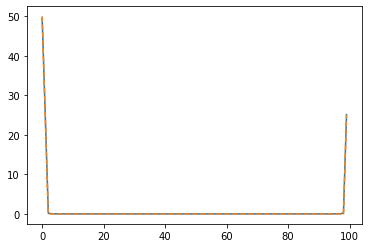

In [336]:
#WHY does this only match when the Ns are diffffferent??
# I really think N = len(x) - aka the number of points, but like why does this not work

DFT_win = np.fft.fft(window(x, max(x)))
# DFT_win = np.fft.fft(window(x, len(x)))


man_arr = np.zeros(len(x))
man_arr[0] = len(x)/2
man_arr[1] = len(x)/4

man_arr[-1] = len(x)/4


# plt.axvline(k, ls=":", color="grey")
plt.plot(abs(DFT_win))
plt.plot(man_arr, ls="--")
plt.show()